In [24]:
#import necessary libraries
import pandas as pd
import json

<h4 style="color:blue">(1) Process Match Results</h4>

In [25]:
with open('t20_json_files/t20_json_files/t20_wc_match_results.json') as f:
    data = json.load(f)

df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [26]:
df_match.shape

(45, 7)

**Use scorecard as a match id to link with other tables**

In [27]:
df_match.rename({'scorecard': 'match_id'}, axis = 1, inplace = True)
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


**Create a match ids dictionary that maps team names to a unique match id. This will be useful later on to link with other tables**

In [28]:
match_ids_dict = {}

for index, row in df_match.iterrows():
    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']
    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']

In [29]:
df_match.to_csv('t20_csv_files/dim_match_summary.csv', index = False)

<h4 style="color:blue">(2) Process Batting Summary</h4>

In [30]:
with open('t20_json_files/t20_json_files/t20_wc_batting_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['battingSummary'])
  
df_batting = pd.DataFrame(all_records)
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00


In [31]:
df_batting['out/not_out'] = df_batting.dismissal.apply(lambda x: "out" if len(x)>0 else "not_out")
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00,out


In [32]:
df_batting['match_id'] = df_batting['match'].map(match_ids_dict)
df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out,T20I # 1823


In [33]:
df_batting.drop(columns=["dismissal"], inplace=True)
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,6,6,0,0,100.00,out,T20I # 1823


**Cleanup weird characters**

In [34]:
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('â€', ''))
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('\xa0', ''))
df_batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [35]:
df_batting.shape

(699, 11)

In [42]:
df_batting.head(20)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,out,T20I # 1823


In [36]:
df_batting.to_csv('t20_csv_files/fact_bating_summary.csv', index = False)

<h4 style="color:blue">(3) Process Bowling Summary</h4>

In [37]:
with open('t20_json_files/t20_json_files/t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
all_records[:2]

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'}]

In [38]:
df_bowling = pd.DataFrame(all_records)
print(df_bowling.shape)
df_bowling.head()

(500, 13)


,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [39]:
df_bowling['match_id'] = df_bowling['match'].map(match_ids_dict)
df_bowling.head(20)


,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1,0,8,0,8.00,1,1,0,0,0,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4,0,16,2,4.00,13,1,0,0,0,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4,0,18,2,4.50,10,1,0,0,0,T20I # 1823
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3,1,22,2,7.33,6,3,0,0,0,T20I # 1823
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3,0,16,1,5.33,7,0,0,1,0,T20I # 1823


In [41]:
df_bowling.to_csv('t20_csv_files/fact_bowling_summary.csv', index = False)
df_bowling.shape

(500, 14)

<h4 style="color:blue">(4) Process Players Information</h4>

In [26]:
with open('t20_json_files/t20_json_files/t20_wc_player_info.json') as f:
    data = json.load(f)

In [27]:
df_players = pd.DataFrame(data)

print(df_players.shape)
df_players.head(10)

(219, 6)


,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendisâ€,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


**Cleanup weird characters**

In [28]:
df_players['name'] = df_players['name'].apply(lambda x: x.replace('â€', ''))
df_players['name'] = df_players['name'].apply(lambda x: x.replace('†', ''))
df_players['name'] = df_players['name'].apply(lambda x: x.replace('\xa0', ''))
df_players.head(10)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [30]:
df_players[df_players['team'] == 'India']

,name,team,battingStyle,bowlingStyle,playingRole,description
127,KL Rahul,India,Right hand Bat,,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
128,Rohit Sharma(c),India,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
129,Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
130,Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
131,Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
132,Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
133,Dinesh Karthik,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
134,Ravichandran Ashwin,India,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
135,Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
136,Arshdeep Singh,India,Left hand Bat,Left arm Medium fast,Bowler,


In [33]:
df_players.to_csv('t20_csv_files/dim_players_no_images.csv', index = False)

In [34]:
df_players.head(20)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


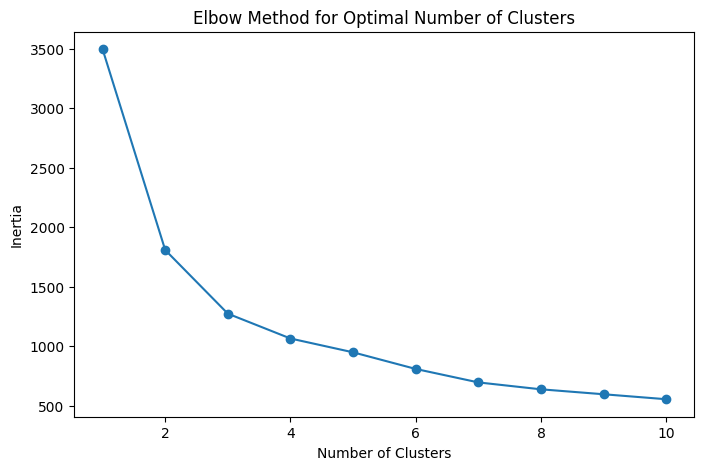

Cluster Centers:
[[ 2.3545831   2.08004408  2.15454375  1.94470793  0.98257276]
 [-0.66128174 -0.61681364 -0.61746107 -0.45557364 -0.69102451]
 [ 0.24312294  0.25764753  0.23870476  0.08179057  0.64671398]]


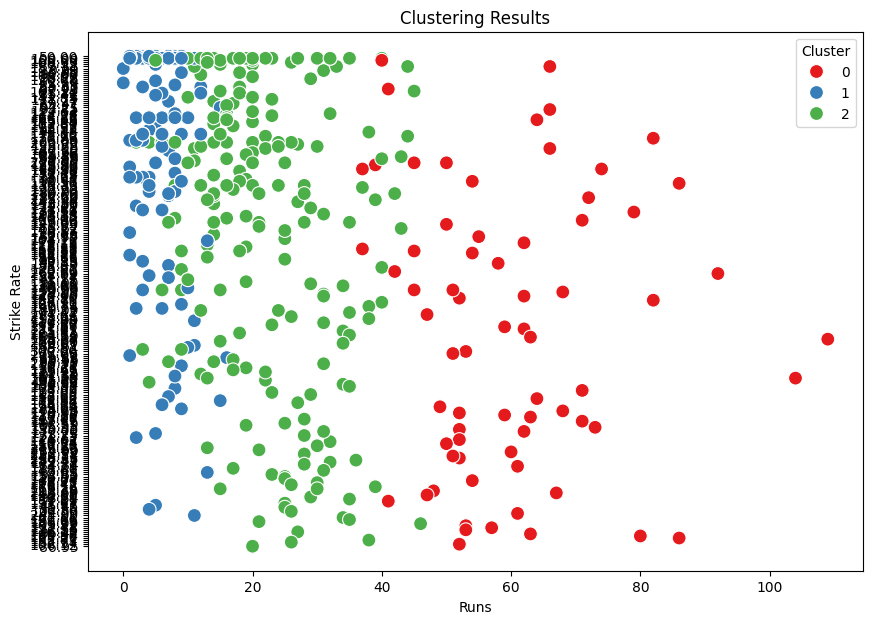

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('t20_csv_files/fact_bating_summary.csv')

# Select relevant numerical columns for clustering
numeric_features = ['runs', 'balls', '4s', '6s', 'SR']
data_numeric = data[numeric_features]

# Handle missing or invalid values (if any)
data_numeric = data_numeric.replace('-', 0).astype(float)  # Replace '-' with 0 and convert to float

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Find the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose an optimal number of clusters (e.g., 3 based on the elbow plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze the clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['runs'], y=data['SR'], hue=data['Cluster'], palette='Set1', s=100
)
plt.title('Clustering Results')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data
data.to_csv('clustered_data.csv', index=False)


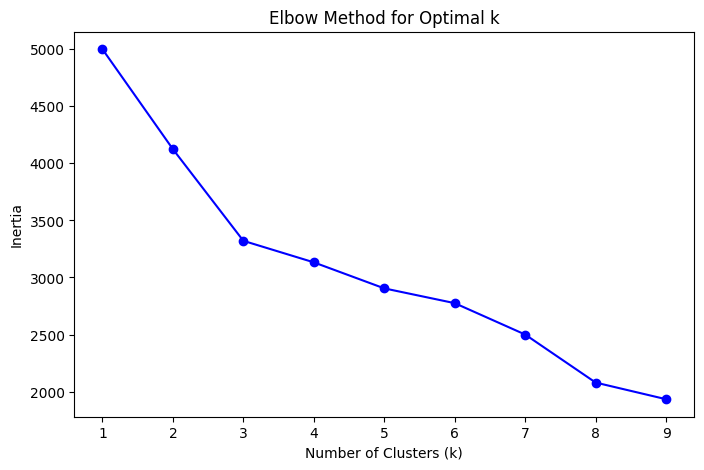

Cluster Centers (standardized):
[[ 0.44378226 -0.11436336  1.08414319 -0.17076992  0.67179769 -0.11716629
   0.7160958   0.78862572  0.32091998  0.24329911]
 [ 0.52951747  0.20406959 -0.31119595  0.59573863 -0.76648878  0.8062107
  -0.24166888 -0.44049297 -0.0311871  -0.11280024]
 [-1.4125499  -0.17713139 -0.90056278 -0.72696599  0.35357971 -1.13041542
  -0.53744018 -0.31481248 -0.36340591 -0.13382638]]


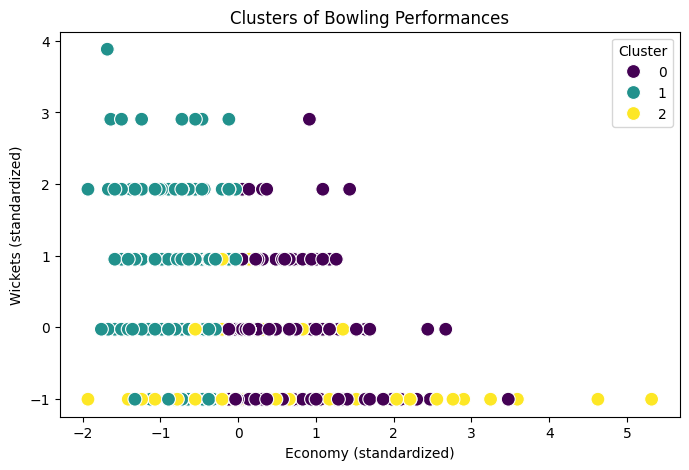

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('t20_csv_files/fact_bowling_summary.csv')

# Select numerical features
numerical_features = ['overs', 'maiden', 'runs', 'wickets', 'economy', '0s', '4s', '6s', 'wides', 'noBalls']

# Preprocess the data
X = df[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means Clustering
optimal_k = 3  # Based on the elbow point in the curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print Cluster Centers
print("Cluster Centers (standardized):")
print(kmeans.cluster_centers_)

# Visualize clusters based on two features (e.g., economy and wickets)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 4], y=X_scaled[:, 3], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Economy (standardized)')
plt.ylabel('Wickets (standardized)')
plt.title('Clusters of Bowling Performances')
plt.legend(title='Cluster')
plt.show()

# Add cluster information to the dataset
df.to_csv('clustered_data.csv', index=False)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load dataset from CSV
data = pd.read_csv('fact_bating_summary.csv')

# Display the first few rows to understand the structure
print(data.head())

# Step 2: Data Preprocessing
# Encode categorical features
batsman_encoder = LabelEncoder()
team_encoder = LabelEncoder()

# Fit encoders on the entire dataset to include all labels
data['batsman_encoded'] = batsman_encoder.fit_transform(data['batsmanName'])
data['team_encoded'] = team_encoder.fit_transform(data['teamInnings'])

# Feature Engineering
data['is_not_out'] = (data['out/not_out'] == 'not_out').astype(int)

# Select relevant features
X = data[['batsman_encoded', 'team_encoded', 'battingPos', 'balls', '4s', '6s', 'is_not_out']]
y = data['runs']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 6: Make predictions
# Replace 'Michael van Lingen' and 'Namibia' with appropriate player/team names from your dataset
new_player_data = pd.DataFrame({
    'batsman_encoded': [batsman_encoder.transform(['Virat Kohli'])[0]],  # Example input
    'team_encoded': [team_encoder.transform(['India'])[0]],
    'battingPos': [1],
    'balls': [50],
    '4s': [1],
    '6s': [1],
    'is_not_out': [0]
})

# Predict runs for the new player
predicted_runs = model.predict(new_player_data)
print("Predicted Runs:", predicted_runs[0])


                  match teamInnings  battingPos             batsmanName  runs  \
0  Namibia Vs Sri Lanka     Namibia           1      Michael van Lingen     3   
1  Namibia Vs Sri Lanka     Namibia           2           Divan la Cock     9   
2  Namibia Vs Sri Lanka     Namibia           3  Jan Nicol Loftie-Eaton    20   
3  Namibia Vs Sri Lanka     Namibia           4           Stephan Baard    26   
4  Namibia Vs Sri Lanka     Namibia           5      Gerhard Erasmus(c)    20   

   balls  4s  6s      SR out/not_out     match_id  
0      6   0   0   50.00         out  T20I # 1823  
1      9   1   0  100.00         out  T20I # 1823  
2     12   1   2  166.66         out  T20I # 1823  
3     24   2   0  108.33         out  T20I # 1823  
4     24   0   0   83.33         out  T20I # 1823  
MAE: 2.44
MSE: 15.77
R² Score: 0.96
Predicted Runs: 42.33


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load Dataset from CSV
file_path = 'fact_bowling_summary.csv'  # Replace with your file path for the dataset
data = pd.read_csv(file_path)

# Step 2: Encode Categorical Variables
encoder = LabelEncoder()
data['bowler_encoded'] = encoder.fit_transform(data['bowlerName'])
data['team_encoded'] = encoder.fit_transform(data['bowlingTeam'])

# Step 3: Select Features and Target
X = data[['bowler_encoded', 'team_encoded', 'overs', 'maiden', 'runs', 'economy', '0s', '4s', '6s', 'wides', 'noBalls']]
y = data['wickets']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Predict Wickets Us'ing New Bowler Data from CSV
new_bowler_file = 'fact_bowling_summary.csv'  # Replace with your file path
new_bowler_data = pd.read_csv(new_bowler_file)

# Ensure the bowler and team names exist in the training data
try:
    new_bowler_data['bowler_encoded'] = encoder.transform(new_bowler_data['bowlerName'])
    new_bowler_data['team_encoded'] = encoder.transform(new_bowler_data['bowlingTeam'])

    features = ['bowler_encoded', 'team_encoded', 'overs', 'maiden', 'runs', 'economy', '0s', '4s', '6s', 'wides', 'noBalls']
    prediction_input = new_bowler_data[features]

    predicted_wickets = model.predict(prediction_input)
    new_bowler_data['Predicted_Wickets'] = predicted_wickets

    print("Prediction Results:")
    print(new_bowler_data[['bowlerName', 'bowlingTeam', 'Predicted_Wickets']])
except ValueError as e:
    print("Warning: Unseen bowler or team detected in the input data. Ensure all names match the training data.")


MAE: 0.77
MSE: 1.02
R² Score: 0.10
